# Run this cell first

In [ ]:
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  %pip install AutoFeedback
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  %pip install "git+https://github.com/autofeedback-exercises/exercises.git#subdirectory=MTH2031/crashcourse/odeint"
  from testsrc import test_main

def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except AssertionError:
      pass


# Solving ODEs numerically

You will learn many methods for solving differential equations during your degree, but many of them amount to tricks- I can honestly say that I have never needed to use an integrating factor or complementary function in ten years of being a professional mathematician. However, because differential equations are ubiquitous in tech, science and finance, there is a well-established toolset for solving them computationally, and in this lesson, you'll learn one of the most basic tools. The solver we will use is called `odeint` (Ordinary Differential Equation Integrator), and it is part of the `scipy` (scientific python) library.

## `odeint`
Let's consider possibly the simplest differential equation:
$$\dfrac{dy}{dx} = y,$$
which has the solution
$$y=y_0e^x \text{ where } y_0 = y(0).$$

In order to solve this equation with `odeint`, we must define three things:

1. A function which takes $y$ and $x$ as inputs, returns the value of $\frac{dy}{dx}$- we will call our function `dydx` and it will simply return `y` (as $\frac{dy}{dx} = y$)
2. An initial condition, which is just a number, `y0`, which we will take to be 1 (i.e. we take $y(0) = 1$)
3. An independent variable, which is an array of values, `x`

To check our result we will also plot it against the known solution. The whole thing looks like this

Text(0, 0.5, 'y')

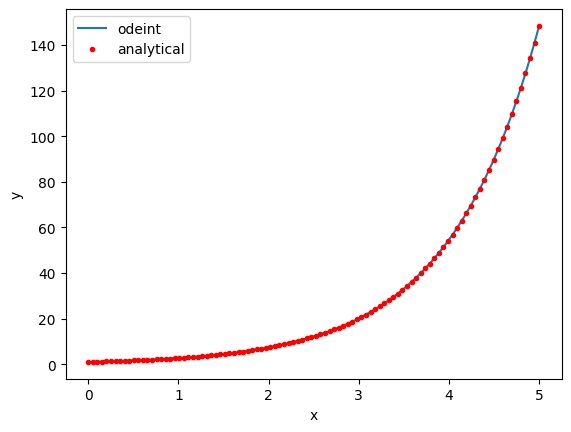

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


def dydx(y, x):
   return y

x = np.linspace(0, 5, 100)
y0 = 1
y = odeint(dydx, y0, x)

plt.plot(x, y, label='odeint')
plt.plot(x, np.exp(x), 'r.', label='analytical')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Although this looks like a lot of code, the actual solution only requires five lines: the definitions of `dydx`, `x`, `y0` and the call to `odeint` to solve the equation. The rest is importing libraries and plotting. 

---

WARNING: although we are referring to $y_0$ as the _initial_ condition, implying $y_0 = y(x=0)$, `odeint` uses the first element in the independent variable array as the 'initial' value. Thus, if our code read

```python
x = np.linspace(-5, 5, 100)
y0 = 1
```

this would equate to $y(x=-5) = 1$.

---
To take this a little further, let's see how we can use odeint to solve systems of differential equations, and thereby, higher order differential equations.

Consider perhaps the second simplest differential equation: 

$$\dfrac{d^2x}{dt^2} = - \omega^2x,$$

where $\omega$ is a constant, which is the equation describing simple harmonic motion (e.g. of a simple pendulum or a mass on a spring). In order to solve this second-order equation, we require two initial conditions. E.G for a mass on a spring we might be told the mass '_is released from rest at a distance $x_0$ from the equilibrium position_': '_released from rest_' tells us 
$$\left[ \frac{dx}{dt} \right]_{t=0} = 0,$$
and '_a distance $x_0$ from the rest position_' tells us $$x(0) = x_0.$$

This already gives a clue as to how we might solve the equation. Instead of thinking of this problem as one, second-order differential equation for the position, $x$ , we can instead think of it as two coupled, first-order differential equations, one for the position, $x$ , and one for the velocity $v=\frac{dx}{dt}$. That looks like this:
$$\begin{align}  \dfrac{dx}{dt} &= v,  \\
\dfrac{dv}{dt} &= -\omega^2x, 
\end{align}$$
with our two initial conditions written simply as $x(0)=x_0$ and $v(0)=v_0$. This is now what is called a system of differential equations, and we can use `odeint` to solve it. 

To do so, we need to modify our code somewhat, but not drastically. Basically, wherever we used the single, dependent variable $y$, before, we now need to use a vector, or array of dependent variables, $x$ and $v$. Thus

* our function (which we'll call `shm` this time- the name doesn't really matter) now takes as its first argument an array of two variables ($x$ and $v$) and returns an array holding their derivatives ($\frac{dx}{dt}$ and $\frac{dv}{dt}$)
* our initial condition will now be an array holding $x_0$ and $v_0$

Once again, we will plot `odeint`'s solution against the analytically calculated solution. For that purpose we will take $\omega=3$, $x_0=1$ and $v_0=0$ (released from rest from $x=1$). The whole solution now looks like this:

Text(0, 0.5, 'x')

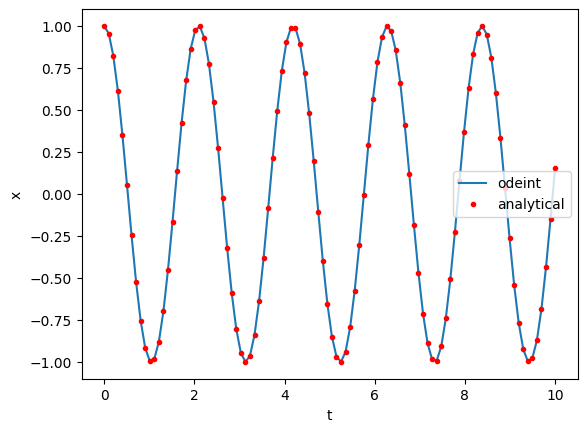

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def shm(vec,t):
  """shm equations:
      dx/dt = v,
      dv/dt = -w^2 x
  """
  x, v = vec
  return [v, -9*x]

t = np.linspace(0, 10, 100)
initial = [1, 0]  #  [x0, v0] release from rest (v=0) from x=1
vec = odeint(shm, initial, t)
x = vec[:, 0]
v = vec[:, 1]

plt.plot(t, x, label='odeint')
plt.plot(t, np.cos(3*t), 'r.', label='analytical')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')

Note there is one additional step here which is 'unpacking' the solution. We call `odeint` and the solution is stored in the variable `vec`, but `vec` is a two-column array containing the solution for `x` AND the solution for `v`. So the lines 

```python
x = vec[:, 0]
v = vec[:, 1]
``` 
pull out the two columns for the plot. 

# Instructions  

1. Consider the differential equation:

$$\dfrac{dy}{dt} = \dfrac{y}{t} \quad \text{ where } \quad y(-5) = -10$$

solve this equation using `odeint`:

* define a function `dydt` which takes two arguments `y` and `t` and returns the
    value of the dy/dt. 
* define an independent variable with 100 linearly spaced values between -5 and 5.
* use the appropriate initial value, independent variable and function to solve
 the differential equation with `odeint`. Store the solution in the variable `y`
* plot the solution (`y` as a function of `t`), and label the axes `'y'` and `'t'` as appropriate





In [ ]:
# your code goes here




# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()

In [ ]:
runtest(["test_1_dydt", "test_2_y", "test_plot1"])


### ASIDE

what do you notice about the behaviour of the differential equation when $t=0$? What should happen? Try changing your array of `t` values to start at 0 instead of -5- what happens now?

---

2. Consider the differential equation for the angle, $\theta$, of a pendulum acted on by
   gravity and friction:

$$\dfrac{d^2 \theta(t)}{dt^2} + 0.25\dfrac{d\theta(t)}{dt} + 5\sin\theta(t) = 0$$


Convert this to a system of first order differential equations by substituting 

$$\dfrac{d\theta}{dt} = \omega$$

into the equation and solve this system using `odeint`

* define a function `pend` which takes two arguments `vec` and `t` where `vec`
    contains [`theta`, `omega`], and returns [(derivative of theta), (derivative of omega)]
* define an independent variable with 100 linearly spaced values between 0 and 10.
* set appropriate initial values to model the pendulum being released from rest
    at an angle of $\theta= \pi/2$. (note that omega is the angular velocity)
* use `odeint` to solve the system and store the solution
* unpack the solution to store the variables `theta` and `omega` separately.
* plot the solution (`theta` as a function of `t`) and label the axes `'t'` and `'theta'` as appropriate

In [ ]:
# your code goes here



# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()

In [ ]:
runtest(["test_3_pend", "test_4_pendulum", "test_plot2"])